In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
from math import sin, cos, sqrt, atan2, radians
import json
import pprint
import ast

In [5]:
Course_df = pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/19-20-fall-course.xlsx") #course list
TA_df =pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/19-20-fall-ta.xlsx") # TA preference list

In [6]:
course_n_rows, course_n_columns = Course_df.shape  # get the shape of dataframe
print("Shape of course dataframe is")
print("number of rows: {}, number of columns: {}".format(course_n_rows, course_n_columns))

Shape of course dataframe is
number of rows: 112, number of columns: 9


In [7]:
n_rows, n_columns = TA_df.shape  # get the shape of dataframe
print("Shape of TA dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of TA dataframe is
number of rows: 380, number of columns: 11


## Brief preview of both TA and Course preference lists

In [8]:
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
0,NaN,NaN,NaN,NaN,Grad Program,NaN,NaN,NaN,NaN
1,20002.0,ADP MATH 101/102,0,Adp Courses,CS,140.0,40.0,1-Kadriye Kahraman ( 72553 ) (20 / 20)\n1-Hoss...,"Hossein Rajabnia (72779, ME, 10 hours)\nKadriy..."
2,20001.0,ADP NS 101/102,0,Adp Courses,CS,75.0,40.0,1-Mohammad Naqib Rahimi ( 72982 ) (15 / 15)\n1...,"Tugdem Muslu (72693, BIO, 20 hours)\nSezgi Kay..."
3,10448.0,BIO 303,0,Genetics,NaN,45.0,20.0,1-Cem Azgari ( 72887 ) (20 / 20)\n1-Irem Akulk...,"Saleh Bader Saleh Ghanem (72652, BIO, 15 hours..."
4,10451.0,BIO 306,0,Microbiology,NaN,20.0,20.0,1-Sahra Aras ( 73110 ) (15 / 15)\n1-Sinem Sari...,"Ramiz Demir (72973, BIO, 10 hours)\nSinem Sari..."


In [9]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,27449,Abdul Vahap \nYoğurtçuoğlu,MS,MFE,0,10,NaN,NaN,NaN,NaN,NaN
1,16440,Abdulkadir \nUzun,MS,EE,10,10,1- EE 409 (10 / 10),EE 409,10553.0,NaN,NaN
2,19076,Abdullah Kutay\nCankı,MS,EE,15,15,1- CS 303 (105 / 190)\n2- ENS 211 (65 / 80)\n3...,ENS 211,10601.0,NaN,NaN
3,21587,Abdulrahman Saeed Abdulqader\nAl-Nadhari,PHD,MAT,15,15,1- ENS 205 (175 / 160)\n2- MAT 314 (10 / 5)\n3...,NS 102,10971.0,NaN,NaN
4,27191,Abdurrahim Can\nEgil,MS,MAT,20,20,1- MATH 101 (330 / 390)\n2- BIO 321 (40 / 25)\...,MATH 101,10920.0,NaN,NaN


## Data types for TA & Courses dataframes

In [10]:
Course_df.dtypes

CRN                          float64
Name                          object
Section                       object
Title                         object
Preferred                     object
Hours Assigned               float64
Hours Requested              float64
Requesting Teaching Grads     object
Assigned Teaching Grads       object
dtype: object

In [11]:
TA_df.dtypes

Student ID             int64
Name                  object
Degree                object
Program               object
Hours Assigned         int64
Hours Requested        int64
Requested Courses     object
Assigned Course 1     object
CRN 1                float64
Assigned Course 2     object
CRN 2                float64
dtype: object

## Dealing with Dirty Data 

In [12]:
# TA dataframe first
TA_df = TA_df.fillna(0) # NaN values are cumbersome values. Change all to 0
TA_df['CRN 1'] = TA_df['CRN 1'].astype('int64') # CRN values are actually integer values. However , they are float in the file
# Change the CRN 1 column value type to int as expected
TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')
#Change the CRN 2 column value type to int as expected
TA_df['Name'] = TA_df['Name'].replace('\n',' ', regex=True)
TA_df['Assigned Course 2'] = TA_df['Assigned Course 2'].replace('\n',' ', regex=True)

In [13]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,27449,Abdul Vahap Yoğurtçuoğlu,MS,MFE,0,10,0,0,0,0,0
1,16440,Abdulkadir Uzun,MS,EE,10,10,1- EE 409 (10 / 10),EE 409,10553,0,0
2,19076,Abdullah Kutay Cankı,MS,EE,15,15,1- CS 303 (105 / 190)\n2- ENS 211 (65 / 80)\n3...,ENS 211,10601,0,0
3,21587,Abdulrahman Saeed Abdulqader Al-Nadhari,PHD,MAT,15,15,1- ENS 205 (175 / 160)\n2- MAT 314 (10 / 5)\n3...,NS 102,10971,0,0
4,27191,Abdurrahim Can Egil,MS,MAT,20,20,1- MATH 101 (330 / 390)\n2- BIO 321 (40 / 25)\...,MATH 101,10920,0,0


In [14]:
# Course dataframes turn
Course_df = Course_df.fillna('0') # replace all NaN values with 0
Course_df = Course_df.drop(Course_df.index[0])
Course_df['CRN'] = Course_df['CRN'].astype('int64')
Course_df['Hours Assigned'] = Course_df['Hours Assigned'].astype('int64')
Course_df['Hours Requested'] = Course_df['Hours Requested'].astype('int64')
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,20002,ADP MATH 101/102,0,Adp Courses,CS,140,40,1-Kadriye Kahraman ( 72553 ) (20 / 20)\n1-Hoss...,"Hossein Rajabnia (72779, ME, 10 hours)\nKadriy..."
2,20001,ADP NS 101/102,0,Adp Courses,CS,75,40,1-Mohammad Naqib Rahimi ( 72982 ) (15 / 15)\n1...,"Tugdem Muslu (72693, BIO, 20 hours)\nSezgi Kay..."
3,10448,BIO 303,0,Genetics,0,45,20,1-Cem Azgari ( 72887 ) (20 / 20)\n1-Irem Akulk...,"Saleh Bader Saleh Ghanem (72652, BIO, 15 hours..."
4,10451,BIO 306,0,Microbiology,0,20,20,1-Sahra Aras ( 73110 ) (15 / 15)\n1-Sinem Sari...,"Ramiz Demir (72973, BIO, 10 hours)\nSinem Sari..."
5,10453,BIO 321,0,Biochemistry I,0,40,25,1-Zeynep Cokluk ( 72890 ) (15 / 15)\n1-Eda Cap...,"Zeynep Cokluk (72890, BIO, 15 hours)\nYusuf Ce..."


## How many TA's requested for each course ?

In [15]:
for courses in range(1,course_n_rows) :
    data_temp = Course_df.at[courses,'Requesting Teaching Grads']
    if  data_temp != "0" :
        data = Course_df.at[courses,'Requesting Teaching Grads'].splitlines()
        print(Course_df.at[courses,'Name'] , "requested" ,len(data),"TA's")

ADP MATH 101/102 requested 12 TA's
ADP NS 101/102 requested 6 TA's
BIO 303 requested 18 TA's
BIO 306 requested 11 TA's
BIO 321 requested 14 TA's
BIO 363 requested 10 TA's
BIO 407 requested 7 TA's
BIO 415 requested 7 TA's
BIO 445 requested 4 TA's
BIO 452 requested 8 TA's
CHEM 301 requested 8 TA's
CS 100 requested 8 TA's
CS 201 requested 38 TA's
CS 204 requested 24 TA's
CS 210 requested 21 TA's
CS 300 requested 10 TA's
CS 301 requested 7 TA's
CS 302 requested 3 TA's
CS 303 requested 13 TA's
CS 307 requested 8 TA's
CS 405 requested 2 TA's
CS 408 requested 12 TA's
CS 409 requested 4 TA's
CS 411 requested 11 TA's
CS 412 requested 11 TA's
CS 48000 requested 5 TA's
EE 303 requested 5 TA's
EE 307 requested 3 TA's
EE 311 requested 3 TA's
EE 313 requested 1 TA's
EE 401 requested 4 TA's
EE 403 requested 4 TA's
EE 407 requested 2 TA's
EE 409 requested 3 TA's
EE 411 requested 1 TA's
EE 413 requested 1 TA's
EE 414 requested 1 TA's
EE 417 requested 2 TA's
EE 473 requested 1 TA's
ENS 202 requested 15 

In [16]:
for TA in range(1,course_n_rows) :
    if Course_df.at[TA,'Assigned Teaching Grads'] != "None" :
        data = Course_df.at[TA,'Assigned Teaching Grads'].splitlines()
        print(Course_df.at[TA,'Name'] , "assigned" ,len(data),"TA's")
    else :
        print(Course_df.at[TA,'Name'] , "assigned" , 0,"TA's")

ADP MATH 101/102 assigned 9 TA's
ADP NS 101/102 assigned 4 TA's
BIO 303 assigned 3 TA's
BIO 306 assigned 2 TA's
BIO 321 assigned 3 TA's
BIO 363 assigned 1 TA's
BIO 407 assigned 1 TA's
BIO 415 assigned 1 TA's
BIO 445 assigned 1 TA's
BIO 452 assigned 2 TA's
CHEM 301 assigned 2 TA's
CS 100 assigned 1 TA's
CS 201 assigned 12 TA's
CS 204 assigned 7 TA's
CS 210 assigned 4 TA's
CS 300 assigned 3 TA's
CS 301 assigned 3 TA's
CS 302 assigned 2 TA's
CS 303 assigned 6 TA's
CS 307 assigned 3 TA's
CS 405 assigned 1 TA's
CS 408 assigned 4 TA's
CS 409 assigned 1 TA's
CS 411 assigned 3 TA's
CS 412 assigned 2 TA's
CS 48000 assigned 1 TA's
EE 303 assigned 2 TA's
EE 307 assigned 2 TA's
EE 311 assigned 1 TA's
EE 313 assigned 1 TA's
EE 401 assigned 1 TA's
EE 403 assigned 1 TA's
EE 407 assigned 4 TA's
EE 409 assigned 1 TA's
EE 411 assigned 1 TA's
EE 413 assigned 0 TA's
EE 414 assigned 1 TA's
EE 417 assigned 2 TA's
EE 473 assigned 1 TA's
ENS 202 assigned 4 TA's
ENS 203 assigned 5 TA's
ENS 204 assigned 5 TA's


## Number of Ta's for each program

In [17]:
top_programs = TA_df['Program'].value_counts()
print(top_programs)

MAT      69
ME       58
CS       53
BIO      47
IE       41
MFE      37
EE       32
MATH     23
PHYS     13
CYSEC     7
Name: Program, dtype: int64


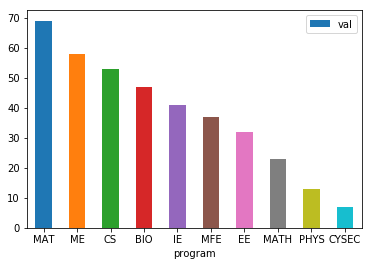

In [18]:
df = pd.DataFrame({'program':['MAT', 'ME', 'CS','BIO','IE','MFE','EE','MATH','PHYS','CYSEC'], 'val':[69, 58, 53,47,41,37,32,23,13,7]})
ax = df.plot.bar(x='program', y='val', rot=0)